In [67]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

def load_data_from_file(filename = 'advertising.csv'):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1, dtype=None)
    features_x = data[:, :3]
    sales_y = data[:, 3]

    N = len(sales_y)
    features_x = np.c_[np.ones((N, 1)), features_x]

    return features_x, sales_y

In [68]:
features_X, sales_Y = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [69]:
print(sales_Y.shape)

(200,)


In [47]:
def create_individual(n=4, bound=10):
    individual = [(random.random()*2 - 1)*bound/2 for _ in range(n)]

    return individual

individual = create_individual()
print(individual)

[-2.395076896080406, 3.0502782701302236, 0.4869930383558929, -4.8595829983598104]


In [70]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.mean((y_hat - sales_Y)**2)
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0

    fitness_value = 1/(loss+1)
    return fitness_value

In [49]:
features_X , sales_Y = load_data_from_file ()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


In [71]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    N = len(individual1)
    for i in range(N):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new


In [51]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [72]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = -individual[i]
    
    return individual_m

In [53]:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [73]:
def initialize_population(m):
    population = [create_individual() for _ in range(m)]
    return population

def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if index1 != index2:
            break
    
    if index1 > index2:
        return sorted_old_population[index1]
    else:
        return sorted_old_population[index2]

In [74]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population,
                               key=compute_fitness)
    
    if gen%1 == 0:
        print (" Best loss :" , compute_loss(sorted_population [m -1]) , " with chromsome : " ,
sorted_population [m -1])
    
    new_population = []
    while len(new_population) < m:
        individual1, individual2 = selection(sorted_population, m), selection(sorted_population, m)
        individual1_new, individual2_new = crossover(individual1, individual2)
        new_population.append(mutate(individual1_new))
        new_population.append(mutate(individual2_new))

    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)
    
    return new_population, compute_loss(sorted_population[m-1])


In [81]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

 Best loss : 123415.051528805  with chromsome :  [3.44, 2.57, -0.79, -2.41]


In [85]:
def run_ga():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initialize_population(m)
    losses_list = []
    for i in range(n_generations):
        population, loss = create_new_population(population)
        losses_list.append(loss)
    
    return losses_list


In [86]:
def visualize_loss(losses_list):
    plt.plot(list(range(len(losses_list))), losses_list, color='g')
    plt.xlabel("Generation")
    plt.ylabel("Losses")
    plt.show()

 Best loss : 567.9210982483207  with chromsome :  [-1.7204527062167774, 0.044023176239113004, 0.31874717736554037, -0.5770811508709917]
 Best loss : 160.96927134896916  with chromsome :  [-2.941747929178895, 0.10014747695373138, 0.8194087452684495, -0.47865924610535515]
 Best loss : 160.96927134896916  with chromsome :  [-2.941747929178895, 0.10014747695373138, 0.8194087452684495, -0.47865924610535515]
 Best loss : 69.19677468095142  with chromsome :  [0.49115579754813843, 0.044023176239113004, 0.31874717736554037, -0.19887816224853583]
 Best loss : 54.04553319764071  with chromsome :  [1.7094741609491815, 0.044023176239113004, 0.31874717736554037, -0.19887816224853583]
 Best loss : 48.17219201722988  with chromsome :  [1.7094741609491815, 0.044023176239113004, 0.34939844877138526, -0.19887816224853583]
 Best loss : 43.94635142063076  with chromsome :  [-1.0987390901139105, 0.10014747695373138, -0.07970189136192518, 0.19887816224853583]
 Best loss : 29.134333485371567  with chromsome :

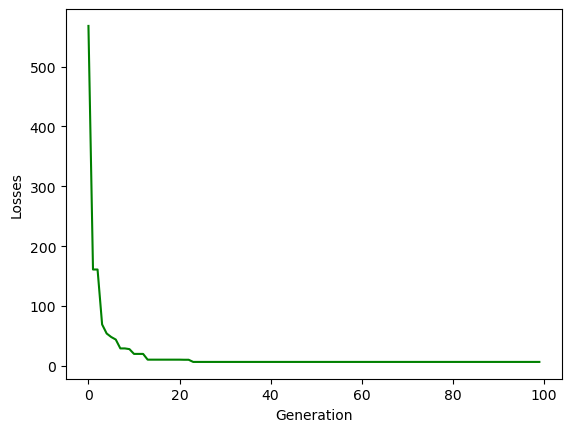

In [88]:
losses_list = run_ga()
visualize_loss(losses_list)